# MAE 3120
## HW 02

Due 02/27

In [30]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

### Digital Camera

- What is the frame rate typically used in movies?<br><p></p>

-> f = 24 fps

- Give the resolution in pixels (horizontal x vertical) of 1080p and 4K TV? At the movie frame rate, you found above to which transfer rate does this correspond? Assume there is no compression and each pixel has 24 bit depth (8 bit/color). Express your values in bit/s. <br><p></p>

1080p is HD (High Definition): R = 1920x1080 pixels

4K is UHD (ultra high definition): R = 3840x2160 pixels

Bit rate: $R_b = R (Number of pixels) \times N (number of bits/pix) \times f (fps)$

Bit rate is typically expressed in:
- Megabit per second (Mbps), $10^6$ bit/s
- Gigabit per second (Gbps), $10^9$ bit/s

In [20]:
#HD
RbHD = 1920*1080*24*24
print('HD: R_b = ', RbHD/1e9, 'Gbps')

HD: R_b =  1.1943936 Gbps


In [21]:
#UHD
RbUHD = 4*RbHD
print('UHD: R_b = ', RbUHD/1e9, 'Gbps')

UHD: R_b =  4.7775744 Gbps


- Compare this bit rate to USB 2, USB 3, and Ethernet protocols.<br><p></p>

https://www.sony.com/electronics/support/articles/00024571

USB 2.0/Hi-Speed: 480 Mbps

USB 3.0/SuperSpeed: 5 Gbps

USB 3.1/SuperSpeed: 10 Gbps

We can stream 4K video on USB 3.0!

- Motion blur can be defined as when the object has moved across the sensor by at least one pixel. Assume that the object is a 2 cm diameter sphere, the diameter is imaged over 20 pixels, and it moves at 1 m/s. What should be the maximum exposure time, so that there is no motion blur?

We want minimum displacement $dx$ of one pixel.

For a time of flight system like here, the velocity $U$ is given by:
\begin{align}
U = M \frac{dx}{dt}
\end{align}
with: $M$ magnification (m/pix), $dx$ displacement in pixel, $dt$ time interval

In [23]:
U = 1 # Velocity (m/s)
Dm = 0.02 # Diameter (m)
Dp = 20 # Diameter (pixel)
dx = 1 # one pixel displacement

# first we need the magnification, M
M = Dm/Dp
print('M = ', M, 'm/pix')

# corresponding time:
dt = M * dx /U
print('dt = ', dt, 's')

M =  0.001 m/pix
dt =  0.001 s


###  Fourier Transform

Consider the periodic function:

\begin{align}
y(t) = \frac{t}{\pi} \quad \text{for}\, -\pi \geq t > \pi
\end{align}

(a) Plot the function $y(t)$ for $-2 \pi \geq t > 2 \pi$.

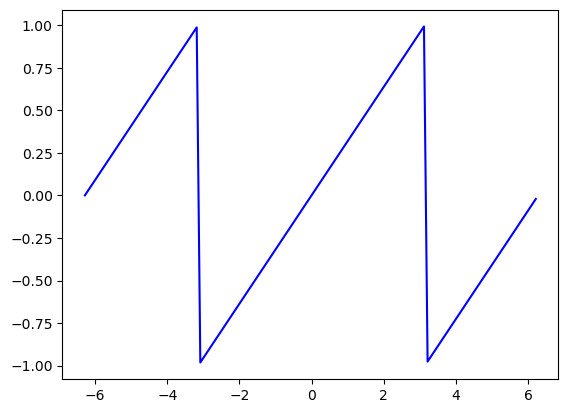

In [31]:
t = np.arange(-2*np.pi, 2*np.pi, 0.1) # Create an array of evenly spaced time steps from -2pi to 2pi

# Define a function y(t)
def y(t): # Define a function for y(t)
    t_actual = t - (2*np.pi * np.rint(t / (2*np.pi))) # round t to the nearest 2pi and then subtract it from t
    return t_actual / np.pi
                    
pyplot.plot(t,y(t),'b'); # plot the function

(b) Is the function odd or even? What does this imply for the Fourier coefficients $A_n$ and $B_n$?

-> The function is odd.  Thus all the $A_n$ are null and we only need to compute the $B_n$.

(c) Calculate $A_0$ and the $A_n$ and $B_n$.

The period of the function is $T=2\pi$, from $-\pi$ to $\pi$.  The function as 0 mean, so $A_0$ = 0.

\begin{align}
B_n & = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \sin \left(\frac{2 \pi n t}{T} \right) dt\\
B_n & = \frac{1}{\pi} \int_{-\pi}^{\pi} \frac{t}{\pi} \sin \left(n t \right) dt\\
\end{align}
This is solved by integration by parts: $\int uv' = uv - \int u'v$

with $u = \frac{t}{\pi}$, $v'=\sin(nt)$. Thus: $u'=\frac{1}{\pi}$ and $v=-\frac{1}{n} \cos(nt)$
\begin{align}
B_n & = \frac{1}{\pi} \int_{-\pi}^{\pi} \frac{t}{\pi} \sin \left(n t \right) dt\\
& = \left[ -\frac{t}{n\pi} \cos (nt) \right]_{-\pi}^{\pi} + \int_{-\pi}^{\pi} \frac{1}{n\pi} \cos(nt) dt
\end{align}
with $\int_{-\pi}^{\pi} \frac{1}{n\pi} \cos(nt) dt = 0$
\begin{align}
B_n = -\frac{1}{n} \cos (n\pi) -\frac{1}{n} \cos (-n\pi) 
\end{align}
with $\cos (-n\pi) = \cos (n\pi)$
\begin{align}
B_n = -\frac{2}{n} \cos (n\pi)
\end{align}
with $\cos (n\pi) = (-1)^n$
\begin{align}
B_n = 2\frac{(-1)^{n+1}}{n} 
\end{align}


(d) Plot the first 8 harmonics ($n = 1 : 8$).

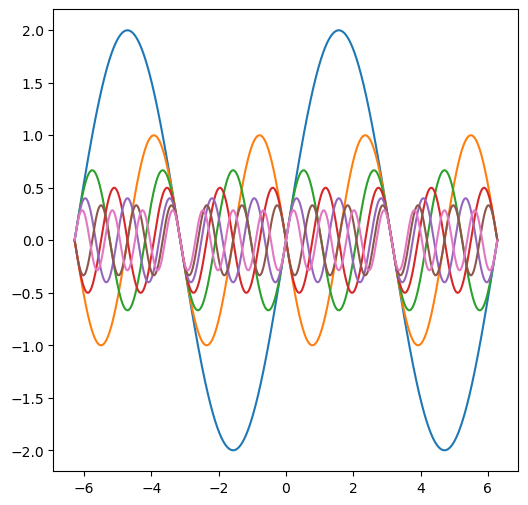

In [36]:
# let's plot each harmonics
t = np.linspace(-2*3.14159,2*3.14159,num=10000)

n=8
fig = pyplot.figure(figsize=(6,6))
for i in range(1,n):
    y = 2/i*(-1)**(i+1) * np.sin((i)*t)
    pyplot.plot(t, y) #, color='k', linestyle='-')

(e) Plot of the sum of the first 8 harmonics (i.e. Fourier transform) overlapped with the original function. Describe discrepancies between the Fourier series and the original function.

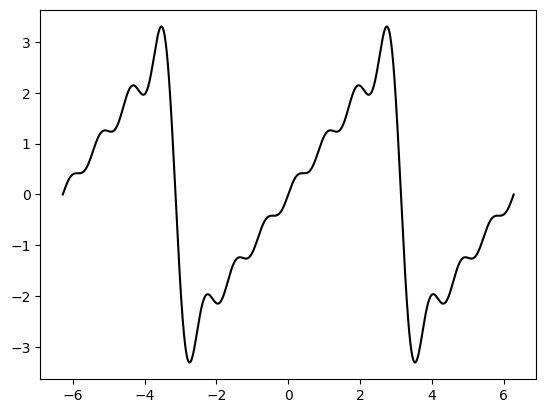

In [38]:
# let's now plot the reconstructed signal

def FourierSeriesSquare(n,t):
    ''' Calculate the Fourier series for square wave making use of notation
    fn = (2n-1) f1
    Arguments
    ---------
    n: number harmonics to plot 
    t: time
    A: amplitude of square wave
    Returns
    -------
    y : Fourier series of square function.
    '''    
    y = 0
    for i in range(1,n):
        y = y + 2/i*(-1)**(i+1) * np.sin((i)*t)
   
    y_out = y

    return y_out

y_sq = FourierSeriesSquare(8,t)

pyplot.plot(t, y_sq, color='k', linestyle='-');

(f) Incease the number of harmonics in your Fourier transform. How many harmonics are necessary to reconstruct the original curve well?

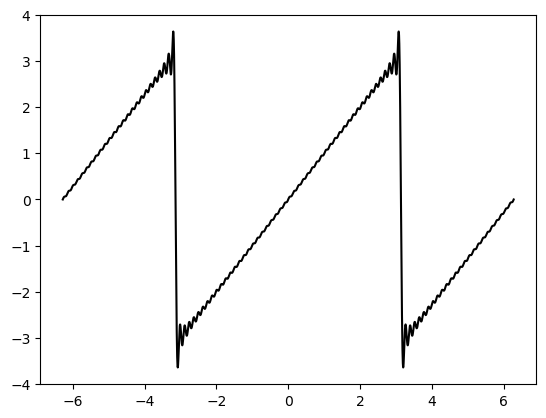

In [39]:
y_sq = FourierSeriesSquare(50,t)

pyplot.plot(t, y_sq, color='k', linestyle='-');

The more harmonics the better.  Because of the discontinuity of the function at $-\pi$ and $\pi$, we would need an infinite number of harmonics to reconstruct the signal without the small oscillations present near the edge of the period.  This is refered to as Gibbs rigging.

### Sampling rate

The function:
\begin{align*}
f(t) = 1.5 + 0.66\cos(4 \pi t) + 1.73\cos( 10 \pi t) - 0.109\cos( 14 \pi t) 
\end{align*}

It is sampled at 5.1 Hz and 1024 points are acquired.

(a) Is there aliasing on any of the harmonics?  If so which harmonic(s)?


-> the signal has harmonics: 2 Hz, 5 Hz, and 7 Hz.

sampling frequency is 5.1 Hz, to request Nyquist criterion max frequency that can be sampled without aliasing is < 5.1/2 < 2.55 Hz.  5 Hz and 7 Hz will be aliased.  They will have the respective apparent frequencies:

5 Hz -> 0.1 Hz
7 Hz -> 2 Hz

(b) Plot the spectrum.

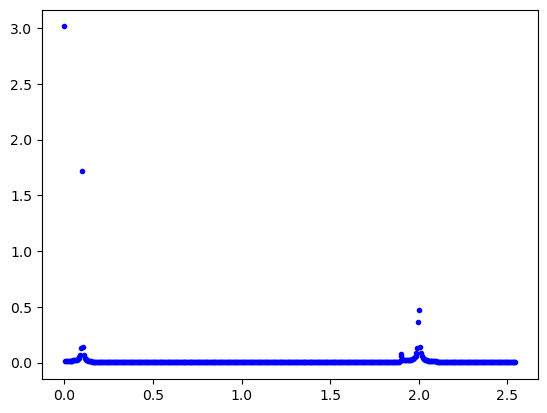

In [9]:
f_s = 5.1 # Hz
N = 1024 # # points
T_s = N/f_s # s

timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector
y_t = 1.5+0.66*np.cos(4*np.pi*t)+1.73*np.cos(10*np.pi*t)-0.109*np.cos(14*np.pi*t)
sp = np.fft.fft(y_t) # compute FFT 

k = np.arange(int(N))
frq = k/T_s # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

pyplot.plot(frq,abs(sp1)*2/N,'b.'); # plotting the spectrum
# need to normalize y axis by *2/N

(c) Plot the original signal and the apparent signal after being sampled.  

Text(0, 0.5, 'Aliased signal')

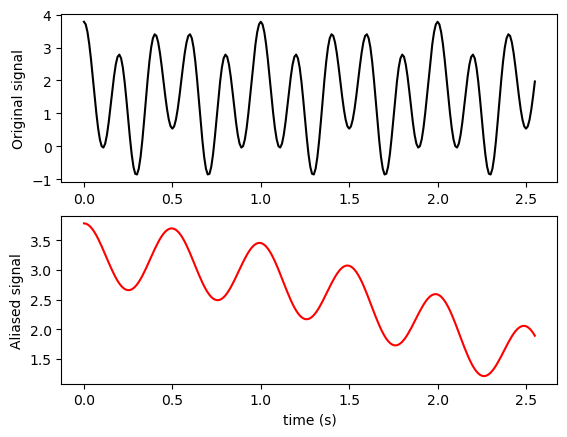

In [11]:
# Note: here I changed the sampling parameters to better see the signal in the time domain.

f_s = 100 # Hz
N = 256 # # points
T_s = N/f_s # st = np.arange(0,T_s/10,timestep/10) # time vector
timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector

y_t = 1.5+0.66*np.cos(4*np.pi*t)+1.73*np.cos(10*np.pi*t)-0.109*np.cos(14*np.pi*t)
# Note I use the apparent frequencies calculated in the previous step to plot the distorted signal
y_td = 1.5+0.66*np.cos(4*np.pi*t)+1.73*np.cos(0.1*2*np.pi*t)-0.109*np.cos(2*2*np.pi*t)


#y_td = np.fft.ifft(sp) # Computer inverse FFT, here we have to take ALL the frequencies

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(t, y_t, 'k-') # plotted less points to see the signal better
#ax[0].set_xlabel('Time')
ax[0].set_ylabel('Original signal')
ax[1].plot(t, y_td, 'r-') 
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Aliased signal')

#pyplot.plot(t[0:50], y_t[0:50], 'k-');

(d) Which term would you use to describe how the sampled signal looks like with respect to the original?

The signal is distorted.